In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
import warnings
warnings.filterwarnings("ignore", message="The default value of the antialias parameter.*")

# 1. Load and normalizing Flowers102 dataset.

Calculate mean and std of Flowers102 dataset.

In [3]:
transform = transforms.Compose([transforms.Resize(500), transforms.ToTensor()])

# 定義 collate_fn 來處理自定義資料集的串接
def collate_fn(batch):
    # 將圖片調整為共同的大小
    images_resized = [transforms.functional.resize(img, (500, 500)) for img, _ in batch]
    images = torch.stack(images_resized, dim=0)
    labels = torch.tensor([label for _, label in batch])
    return images, labels

train_dataset = torchvision.datasets.Flowers102(root='./data', split='test', transform=transform, download=True)
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2, collate_fn=collate_fn)

100%|██████████| 344862509/344862509 [00:10<00:00, 34303222.86it/s]


Extracting data/flowers-102/102flowers.tgz to data/flowers-102


100%|██████████| 502/502 [00:00<00:00, 540852.97it/s]


100%|██████████| 14989/14989 [00:00<00:00, 10022066.42it/s]


In [ ]:
import numpy as np

# 初始化累計值（RGB三个通道）
mean_sum = np.zeros(3)
std_sum = np.zeros(3)
total_samples = 0

# 計算累計的均值和標準差
for images, _ in trainloader:
    batch_samples = images.size(0)
    images = images.view(batch_samples, images.size(1), -1)
    mean_sum += images.mean(2).sum(0).numpy()
    std_sum += images.std(2).sum(0).numpy()
    total_samples += batch_samples

# 計算最終的均值和標準差
dataset_mean = mean_sum / total_samples
dataset_std = std_sum / total_samples
print('Mean:', np.round(dataset_mean, 3))
print('Standard Deviation:', np.round(dataset_std, 3))

Mean: [0.436 0.376 0.285]
Standard Deviation: [0.266 0.212 0.218]


In [4]:
# 刪除資料夾
!rm -rf /content/data

Use data augmentation and concatenate the training dataset.

In [5]:
classes = ('pink primrose', 'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea',
           'english marigold', 'tiger lily', 'moon orchid', 'bird of paradise', 'monkshood', 'globe thistle',
           'snapdragon', "colt's foot", 'king protea', 'spear thistle', 'yellow iris',
           'globe-flower', 'purple coneflower', 'peruvian lily', 'balloon flower', 'giant white arum lily',
           'fire lily', 'pincushion flower', 'fritillary', 'red ginger', 'grape hyacinth', 'corn poppy',
           'prince of wales feathers', 'stemless gentian', 'artichoke', 'sweet william', 'carnation',
           'garden phlox', 'love in the mist', 'mexican aster', 'alpine sea holly', 'ruby-lipped cattleya',
           'cape flower', 'great masterwort', 'siam tulip', 'lenten rose', 'barbeton daisy', 'daffodil',
           'sword lily', 'poinsettia', 'bolero deep blue', 'wallflower', 'marigold', 'buttercup',
           'oxeye daisy', 'common dandelion', 'petunia', 'wild pansy', 'primula', 'sunflower',
           'lilac hibiscus', 'bishop of llandaff', 'gaura', 'geranium', 'orange dahlia', 'pink-yellow dahlia',
           'cautleya spicata', 'japanese anemone', 'black-eyed susan', 'silverbush', 'californian poppy', 'osteospermum',
           'spring crocus', 'bearded iris', 'windflower', 'tree poppy', 'gazania', 'azalea', 'water lily',
           'rose', 'thorn apple', 'morning glory', 'passion flower', 'lotus', 'toad lily', 'anthurium',
           'frangipani', 'clematis', 'hibiscus', 'columbine', 'desert-rose', 'tree mallow', 'magnolia', 'cyclamen',
           'watercress', 'canna lily', 'hippeastrum', 'bee balm', 'pink quill', 'foxglove', 'bougainvillea', 'camellia',
           'mallow', 'mexican petunia', 'bromelia', 'blanket flower', 'trumpet creeper', 'blackberry lily')

augmentation_transform = transforms.Compose([
    transforms.RandomResizedCrop(500),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=30),
    transforms.ToTensor(),
    transforms.Normalize((0.436, 0.376, 0.285), (0.266, 0.212, 0.218))
])

original_transform = transforms.Compose([
    transforms.Resize(500),
    transforms.ToTensor(),
    transforms.Normalize((0.436, 0.376, 0.285), (0.266, 0.212, 0.218))
])

train_dataset_augmented = torchvision.datasets.Flowers102(root='./data', split='test', transform=augmentation_transform, download=True)
train_dataset_original = torchvision.datasets.Flowers102(root='./data', split='test', transform=original_transform, download=True)
concat_dataset = torch.utils.data.ConcatDataset([train_dataset_augmented, train_dataset_original])
trainloader = torch.utils.data.DataLoader(concat_dataset, batch_size=64, shuffle=True, num_workers=2, collate_fn=collate_fn)

val_dataset = torchvision.datasets.Flowers102(root='./data', split='val', transform=original_transform, download=True)
valloader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=2, collate_fn=collate_fn)

test_dataset = torchvision.datasets.Flowers102(root='./data', split='train', transform=original_transform, download=True)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2, collate_fn=collate_fn)

100%|██████████| 344862509/344862509 [00:10<00:00, 34023005.37it/s]


Extracting data/flowers-102/102flowers.tgz to data/flowers-102


100%|██████████| 502/502 [00:00<00:00, 552490.32it/s]


100%|██████████| 14989/14989 [00:00<00:00, 15397605.35it/s]


In [ ]:
print("train_dataset的大小：", len(concat_dataset))
print("val_dataset的大小：", len(val_dataset))
print("test_dataset的大小：", len(test_dataset))

train_dataset的大小： 12298
val_dataset的大小： 1020
test_dataset的大小： 1020


Show some of the training images.



ruby-lipped cattleya, petunia, barbeton daisy, passion flower


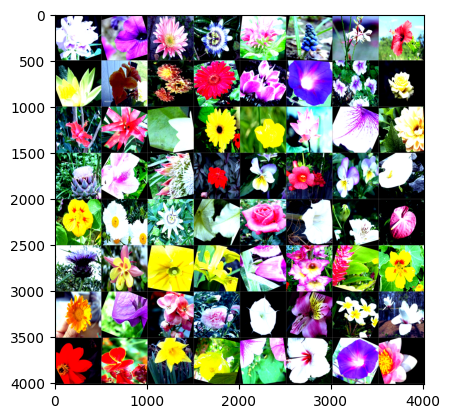

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5

    # 將值clip在0到1之間
    img = np.clip(img, 0, 1)

    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(', '.join('%5s' % classes[labels[j]] for j in range(4)))

Using GPU or other accelerator to Training.

In [ ]:
if torch.cuda.is_available():
    device = 'cuda:0'
    print("[INFO] Current device:", torch.cuda.get_device_name(torch.cuda.current_device()), f", device num:{torch.cuda.current_device()}")
elif torch.has_mps:
    device = 'mps'
    print("[INFO] Current device: MAC OS Metal Performance Shaders.")
else:
    device = 'cpu'
    print("[INFO] Current device: CPU")
    print("*"*50,"\n[WARNING] You may need to change the device to GPU or MPS to get better performance.")
    print("*"*50)
device = torch.device(device)

[INFO] Current device: Tesla T4 , device num:0


# 2. Define a network model

### ResNet model whose activation function is ReLU.

In [ ]:
import torch.nn as nn
# import torch.nn.functional as F

class BasicBlock(nn.Module):
    def __init__(self, in_planes, planes, stride=1, dropout_prob=0.5):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=dropout_prob)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes)
            )

    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.dropout(out)

        out = self.conv2(out)
        out = self.bn2(out)

        out += self.shortcut(x)
        out = self.relu(out)
        return out

class ResNet18(nn.Module):
    def __init__(self, num_classes=1000, dropout_prob=0.5):
        super(ResNet18, self).__init__()
        self.in_planes = 64

        self.pre_layer = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )
        self.layer1 = self._make_layer(64, 2, stride=1, dropout_prob=dropout_prob)
        self.layer2 = self._make_layer(128, 2, stride=2, dropout_prob=dropout_prob)
        self.layer3 = self._make_layer(256, 2, stride=2, dropout_prob=dropout_prob)
        self.layer4 = self._make_layer(512, 2, stride=2, dropout_prob=dropout_prob)
        self.avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)

    def _make_layer(self, planes, num_blocks, stride, dropout_prob):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(BasicBlock(self.in_planes, planes, stride, dropout_prob))
            self.in_planes = planes
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.pre_layer(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avg_pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        # x = F.softmax(x, dim=1)
        return x

net = ResNet18(num_classes=102, dropout_prob=0.5).to(device)

### ResNet model whose activation function is LeakyReLU.(負斜率設為0.1)

In [ ]:
import torch.nn as nn

class BasicBlock(nn.Module):
    def __init__(self, in_planes, planes, stride=1, dropout_prob=0.5):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.leaky_relu = nn.LeakyReLU(negative_slope=0.1)
        self.dropout = nn.Dropout(p=dropout_prob)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes)
            )

    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.leaky_relu(out)
        out = self.dropout(out)

        out = self.conv2(out)
        out = self.bn2(out)

        out += self.shortcut(x)
        out = self.leaky_relu(out)
        return out

class ResNet18(nn.Module):
    def __init__(self, num_classes=1000, dropout_prob=0.5):
        super(ResNet18, self).__init__()
        self.in_planes = 64

        self.pre_layer = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.1),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )
        self.layer1 = self._make_layer(64, 2, stride=1, dropout_prob=dropout_prob)
        self.layer2 = self._make_layer(128, 2, stride=2, dropout_prob=dropout_prob)
        self.layer3 = self._make_layer(256, 2, stride=2, dropout_prob=dropout_prob)
        self.layer4 = self._make_layer(512, 2, stride=2, dropout_prob=dropout_prob)
        self.avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)

    def _make_layer(self, planes, num_blocks, stride, dropout_prob):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(BasicBlock(self.in_planes, planes, stride, dropout_prob))
            self.in_planes = planes
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.pre_layer(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avg_pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

net = ResNet18(num_classes=102, dropout_prob=0.5).to(device)

### ResNet model whose activation function is PReLU.

In [ ]:
import torch.nn as nn

class BasicBlock(nn.Module):
    def __init__(self, in_planes, planes, stride=1, dropout_prob=0.5):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.prelu = nn.PReLU()
        self.dropout = nn.Dropout(p=dropout_prob)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes)
            )

    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.prelu(out)
        out = self.dropout(out)

        out = self.conv2(out)
        out = self.bn2(out)

        out += self.shortcut(x)
        out = self.prelu(out)
        return out

class ResNet18(nn.Module):
    def __init__(self, num_classes=1000, dropout_prob=0.5):
        super(ResNet18, self).__init__()
        self.in_planes = 64

        self.pre_layer = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False),
            nn.BatchNorm2d(64),
            nn.PReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )
        self.layer1 = self._make_layer(64, 2, stride=1, dropout_prob=dropout_prob)
        self.layer2 = self._make_layer(128, 2, stride=2, dropout_prob=dropout_prob)
        self.layer3 = self._make_layer(256, 2, stride=2, dropout_prob=dropout_prob)
        self.layer4 = self._make_layer(512, 2, stride=2, dropout_prob=dropout_prob)
        self.avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)

    def _make_layer(self, planes, num_blocks, stride, dropout_prob):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(BasicBlock(self.in_planes, planes, stride, dropout_prob))
            self.in_planes = planes
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.pre_layer(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avg_pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

net = ResNet18(num_classes=102, dropout_prob=0.5).to(device)

### Convolution Neural Network (ResNet model without shortcut)

In [ ]:
import torch.nn as nn

class BasicBlock(nn.Module):
    def __init__(self, in_planes, planes, stride=1, dropout_prob=0.5):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=dropout_prob)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.dropout(out)

        out = self.conv2(out)
        out = self.bn2(out)

        out = self.relu(out)
        return out

class CNN(nn.Module):
    def __init__(self, num_classes=1000, dropout_prob=0.5):
        super(CNN, self).__init__()
        self.in_planes = 64

        self.pre_layer = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )
        self.layer1 = self._make_layer(64, 2, stride=1, dropout_prob=dropout_prob)
        self.layer2 = self._make_layer(128, 2, stride=2, dropout_prob=dropout_prob)
        self.layer3 = self._make_layer(256, 2, stride=2, dropout_prob=dropout_prob)
        self.layer4 = self._make_layer(512, 2, stride=2, dropout_prob=dropout_prob)
        self.avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)

    def _make_layer(self, planes, num_blocks, stride, dropout_prob):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(BasicBlock(self.in_planes, planes, stride, dropout_prob))
            self.in_planes = planes
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.pre_layer(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avg_pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

net = CNN(num_classes=102, dropout_prob=0.5).to(device)

# 3. Define a Loss function and optimizer

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# 4. Train the network

### ResNet(ReLU)

In [ ]:
train_losses = []
val_losses = []
accuracies = []

EPOCHS = 140
for epoch in range(EPOCHS):
    running_loss = 0.0
    net.train()

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        # 調整模型輸出形狀
        outputs = outputs.view(outputs.size(0), -1)
        # 將目標標籤轉換為 [batch_size]
        labels = labels.view(-1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i == 0:
            print(f"\nEpoch: {epoch+1}")
        print(f"\r\tBatch: {i+1:03} of {len(trainloader)}, Loss: {running_loss / (i+1):.3f}", end='')

    train_loss = running_loss / len(trainloader)
    train_losses.append(train_loss)

    net.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for data in valloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss = val_loss / len(valloader)
    accuracy = correct / total
    val_losses.append(val_loss)
    accuracies.append(accuracy)

    print(f", Validation Loss: {val_loss:.4f}, Accuracy: {accuracy * 100:.2f}%")

print('\nFinished Training')


Epoch: 131
	Batch: 193 of 193, Loss: 0.093, Validation Loss: 1.1719, Accuracy: 79.90%

Epoch: 132
	Batch: 193 of 193, Loss: 0.088, Validation Loss: 1.1392, Accuracy: 80.49%

Epoch: 133
	Batch: 193 of 193, Loss: 0.093, Validation Loss: 1.1765, Accuracy: 80.49%

Epoch: 134
	Batch: 193 of 193, Loss: 0.087, Validation Loss: 1.1528, Accuracy: 80.49%

Epoch: 135
	Batch: 193 of 193, Loss: 0.089, Validation Loss: 1.1637, Accuracy: 80.29%

Epoch: 136
	Batch: 193 of 193, Loss: 0.098, Validation Loss: 1.1633, Accuracy: 80.39%

Epoch: 137
	Batch: 193 of 193, Loss: 0.097, Validation Loss: 1.1540, Accuracy: 80.20%

Epoch: 138
	Batch: 193 of 193, Loss: 0.091, Validation Loss: 1.1930, Accuracy: 79.90%

Epoch: 139
	Batch: 193 of 193, Loss: 0.098, Validation Loss: 1.1576, Accuracy: 80.39%

Epoch: 140
	Batch: 193 of 193, Loss: 0.089, Validation Loss: 1.1563, Accuracy: 80.00%

Finished Training


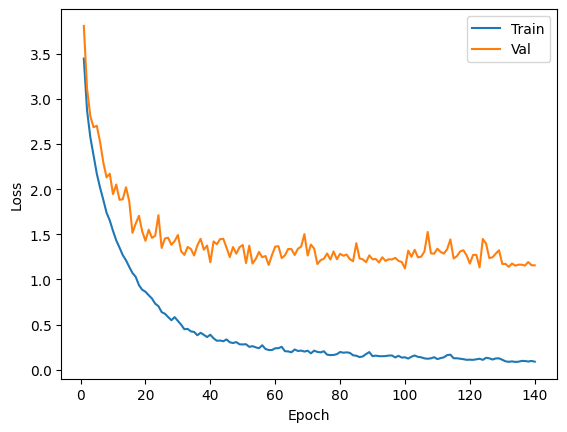

In [ ]:
plt.plot(list(range(1, 141)), train_losses, label='Train')
plt.plot(list(range(1, 141)), val_losses, label='Val')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('/content/train_val_loss_140_ResNet(ReLU).png')
plt.show()

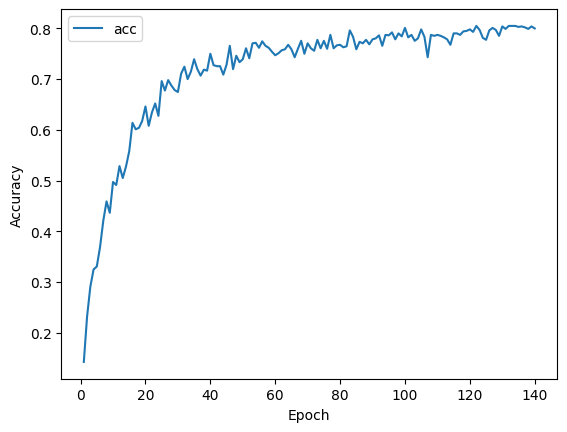

In [ ]:
plt.plot(list(range(1, 141)), accuracies, label='acc')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.savefig('/content/val_acc_140_ResNet(ReLU).png')
plt.show()

### ResNet(Leaky ReLU)

In [ ]:
train_losses = []
val_losses = []
accuracies = []

EPOCHS = 140
for epoch in range(EPOCHS):
    running_loss = 0.0
    net.train()

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        outputs = outputs.view(outputs.size(0), -1)
        labels = labels.view(-1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i == 0:
            print(f"\nEpoch: {epoch+1}")
        print(f"\r\tBatch: {i+1:03} of {len(trainloader)}, Loss: {running_loss / (i+1):.3f}", end='')

    train_loss = running_loss / len(trainloader)
    train_losses.append(train_loss)

    net.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for data in valloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss = val_loss / len(valloader)
    accuracy = correct / total
    val_losses.append(val_loss)
    accuracies.append(accuracy)

    print(f", Validation Loss: {val_loss:.4f}, Accuracy: {accuracy * 100:.2f}%")

print('\nFinished Training')


Epoch: 131
	Batch: 193 of 193, Loss: 0.134, Validation Loss: 1.0969, Accuracy: 81.57%

Epoch: 132
	Batch: 193 of 193, Loss: 0.129, Validation Loss: 1.1277, Accuracy: 82.06%

Epoch: 133
	Batch: 193 of 193, Loss: 0.126, Validation Loss: 1.1226, Accuracy: 83.04%

Epoch: 134
	Batch: 193 of 193, Loss: 0.114, Validation Loss: 1.0475, Accuracy: 82.55%

Epoch: 135
	Batch: 193 of 193, Loss: 0.127, Validation Loss: 1.0730, Accuracy: 82.94%

Epoch: 136
	Batch: 193 of 193, Loss: 0.134, Validation Loss: 1.1248, Accuracy: 81.47%

Epoch: 137
	Batch: 193 of 193, Loss: 0.133, Validation Loss: 1.2423, Accuracy: 81.86%

Epoch: 138
	Batch: 193 of 193, Loss: 0.129, Validation Loss: 1.1444, Accuracy: 81.57%

Epoch: 139
	Batch: 193 of 193, Loss: 0.109, Validation Loss: 1.0588, Accuracy: 83.33%

Epoch: 140
	Batch: 193 of 193, Loss: 0.128, Validation Loss: 1.0402, Accuracy: 82.75%

Finished Training


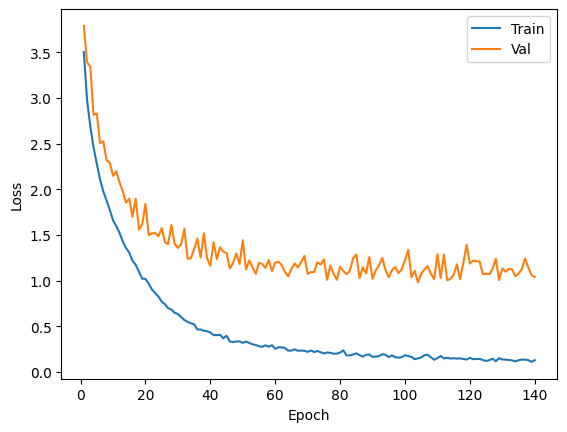

In [ ]:
import matplotlib.pyplot as plt
plt.plot(list(range(1, 141)), train_losses, label='Train')
plt.plot(list(range(1, 141)), val_losses, label='Val')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('/content/train_val_loss_140_ResNet(Leaky ReLU).png')
plt.show()

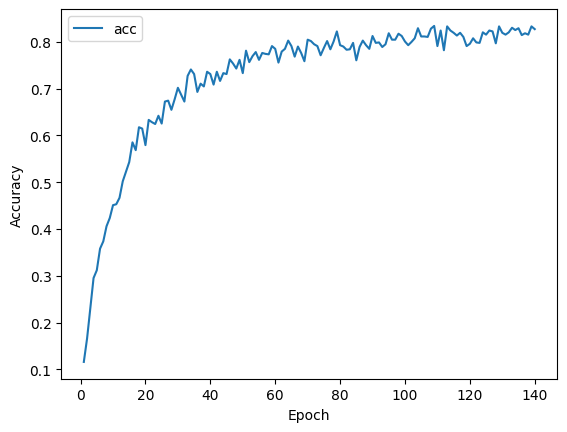

In [ ]:
plt.plot(list(range(1, 141)), accuracies, label='acc')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.savefig('/content/val_acc_140_ResNet(Leaky ReLU).png')
plt.show()

### ResNet(PReLU)

In [ ]:
train_losses = []
val_losses = []
accuracies = []

EPOCHS = 140
for epoch in range(EPOCHS):
    running_loss = 0.0
    net.train()

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        outputs = outputs.view(outputs.size(0), -1)
        labels = labels.view(-1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i == 0:
            print(f"\nEpoch: {epoch+1}")
        print(f"\r\tBatch: {i+1:03} of {len(trainloader)}, Loss: {running_loss / (i+1):.3f}", end='')

    train_loss = running_loss / len(trainloader)
    train_losses.append(train_loss)

    net.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for data in valloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss = val_loss / len(valloader)
    accuracy = correct / total
    val_losses.append(val_loss)
    accuracies.append(accuracy)

    print(f", Validation Loss: {val_loss:.4f}, Accuracy: {accuracy * 100:.2f}%")

print('\nFinished Training')


Epoch: 131
	Batch: 193 of 193, Loss: 0.116, Validation Loss: 1.3608, Accuracy: 77.94%

Epoch: 132
	Batch: 193 of 193, Loss: 0.104, Validation Loss: 1.3024, Accuracy: 78.43%

Epoch: 133
	Batch: 193 of 193, Loss: 0.097, Validation Loss: 1.2411, Accuracy: 79.71%

Epoch: 134
	Batch: 193 of 193, Loss: 0.134, Validation Loss: 1.2204, Accuracy: 79.12%

Epoch: 135
	Batch: 193 of 193, Loss: 0.104, Validation Loss: 1.2521, Accuracy: 79.51%

Epoch: 136
	Batch: 193 of 193, Loss: 0.086, Validation Loss: 1.2034, Accuracy: 79.90%

Epoch: 137
	Batch: 193 of 193, Loss: 0.127, Validation Loss: 1.1992, Accuracy: 80.59%

Epoch: 138
	Batch: 193 of 193, Loss: 0.107, Validation Loss: 1.3024, Accuracy: 80.20%

Epoch: 139
	Batch: 193 of 193, Loss: 0.086, Validation Loss: 1.2703, Accuracy: 81.47%

Epoch: 140
	Batch: 193 of 193, Loss: 0.123, Validation Loss: 1.5504, Accuracy: 78.24%

Finished Training


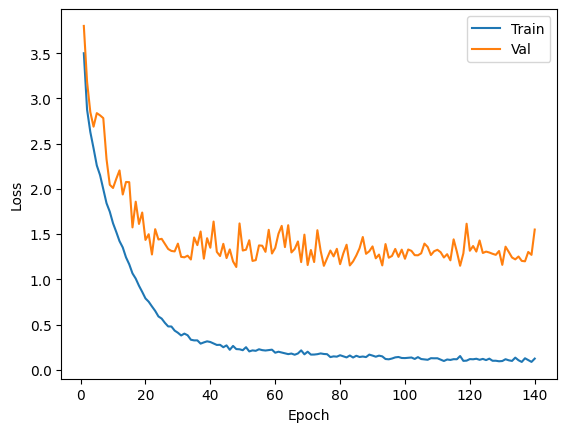

In [ ]:
plt.plot(list(range(1, 141)), train_losses, label='Train')
plt.plot(list(range(1, 141)), val_losses, label='Val')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('/content/train_val_loss_140_ResNet(PReLU).png')
plt.show()

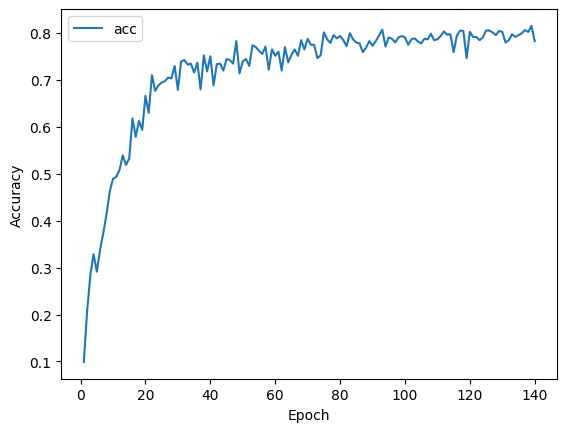

In [ ]:
plt.plot(list(range(1, 141)), accuracies, label='acc')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.savefig('/content/val_acc_140_ResNet(PReLU).png')
plt.show()

### CNN

In [ ]:
train_losses = []
val_losses = []
accuracies = []

EPOCHS = 140
for epoch in range(EPOCHS):
    running_loss = 0.0
    net.train()

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        outputs = outputs.view(outputs.size(0), -1)
        labels = labels.view(-1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i == 0:
            print(f"\nEpoch: {epoch+1}")
        print(f"\r\tBatch: {i+1:03} of {len(trainloader)}, Loss: {running_loss / (i+1):.3f}", end='')

    train_loss = running_loss / len(trainloader)
    train_losses.append(train_loss)

    net.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for data in valloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss = val_loss / len(valloader)
    accuracy = correct / total
    val_losses.append(val_loss)
    accuracies.append(accuracy)

    print(f", Validation Loss: {val_loss:.4f}, Accuracy: {accuracy * 100:.2f}%")

print('\nFinished Training')


Epoch: 131
	Batch: 193 of 193, Loss: 0.177, Validation Loss: 0.6975, Accuracy: 86.47%

Epoch: 132
	Batch: 193 of 193, Loss: 0.182, Validation Loss: 0.5669, Accuracy: 87.55%

Epoch: 133
	Batch: 193 of 193, Loss: 0.171, Validation Loss: 0.6514, Accuracy: 86.08%

Epoch: 134
	Batch: 193 of 193, Loss: 0.170, Validation Loss: 0.7106, Accuracy: 86.67%

Epoch: 135
	Batch: 193 of 193, Loss: 0.174, Validation Loss: 0.6332, Accuracy: 87.55%

Epoch: 136
	Batch: 193 of 193, Loss: 0.161, Validation Loss: 0.7035, Accuracy: 85.59%

Epoch: 137
	Batch: 193 of 193, Loss: 0.163, Validation Loss: 0.6651, Accuracy: 85.88%

Epoch: 138
	Batch: 193 of 193, Loss: 0.174, Validation Loss: 0.8225, Accuracy: 84.80%

Epoch: 139
	Batch: 193 of 193, Loss: 0.162, Validation Loss: 0.6180, Accuracy: 87.16%

Epoch: 140
	Batch: 193 of 193, Loss: 0.158, Validation Loss: 0.6336, Accuracy: 86.37%

Finished Training


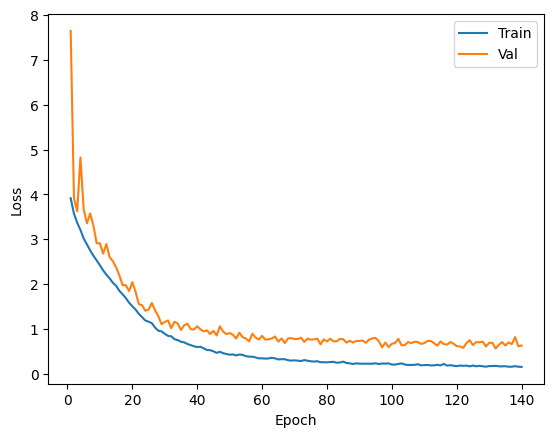

In [ ]:
plt.plot(list(range(1, 141)), train_losses, label='Train')
plt.plot(list(range(1, 141)), val_losses, label='Val')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('/content/train_val_loss_140_CNN.png')
plt.show()

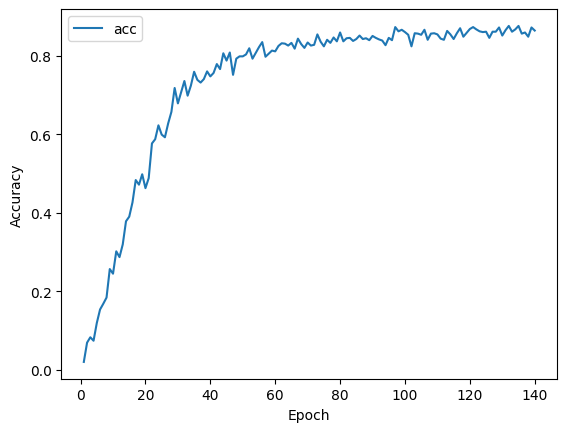

In [ ]:
plt.plot(list(range(1, 141)), accuracies, label='acc')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.savefig('/content/val_acc_140_CNN.png')
plt.show()

### ResNet(ReLU): Size 320, learning rate 0.0001

In [ ]:
train_losses = []
val_losses = []
accuracies = []

EPOCHS = 140
for epoch in range(EPOCHS):
    running_loss = 0.0
    net.train()

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        outputs = outputs.view(outputs.size(0), -1)
        labels = labels.view(-1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i == 0:
            print(f"\nEpoch: {epoch+1}")
        print(f"\r\tBatch: {i+1:03} of {len(trainloader)}, Loss: {running_loss / (i+1):.3f}", end='')

    train_loss = running_loss / len(trainloader)
    train_losses.append(train_loss)

    net.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for data in valloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss = val_loss / len(valloader)
    accuracy = correct / total
    val_losses.append(val_loss)
    accuracies.append(accuracy)

    print(f", Validation Loss: {val_loss:.4f}, Accuracy: {accuracy * 100:.2f}%")

print('\nFinished Training')


Epoch: 131
	Batch: 193 of 193, Loss: 0.127, Validation Loss: 0.7445, Accuracy: 83.82%

Epoch: 132
	Batch: 193 of 193, Loss: 0.121, Validation Loss: 0.8449, Accuracy: 82.75%

Epoch: 133
	Batch: 193 of 193, Loss: 0.108, Validation Loss: 0.8186, Accuracy: 82.25%

Epoch: 134
	Batch: 193 of 193, Loss: 0.107, Validation Loss: 0.7892, Accuracy: 82.84%

Epoch: 135
	Batch: 193 of 193, Loss: 0.100, Validation Loss: 0.8215, Accuracy: 83.14%

Epoch: 136
	Batch: 193 of 193, Loss: 0.108, Validation Loss: 0.7969, Accuracy: 84.12%

Epoch: 137
	Batch: 193 of 193, Loss: 0.109, Validation Loss: 0.6952, Accuracy: 84.71%

Epoch: 138
	Batch: 193 of 193, Loss: 0.104, Validation Loss: 0.8048, Accuracy: 82.75%

Epoch: 139
	Batch: 193 of 193, Loss: 0.115, Validation Loss: 0.8176, Accuracy: 82.65%

Epoch: 140
	Batch: 193 of 193, Loss: 0.122, Validation Loss: 0.7414, Accuracy: 84.51%

Finished Training


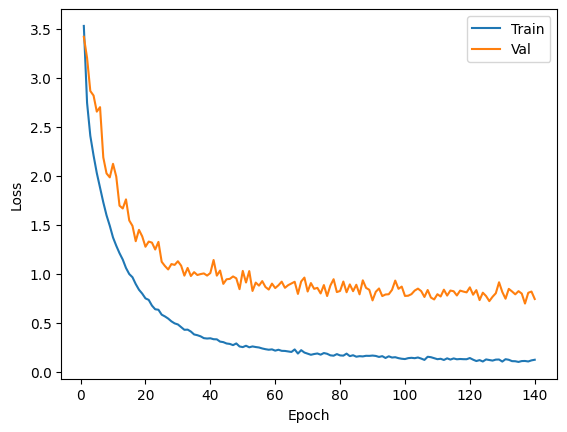

In [ ]:
plt.plot(list(range(1, 141)), train_losses, label='Train')
plt.plot(list(range(1, 141)), val_losses, label='Val')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('/content/train_val_loss_140.png')
plt.show()

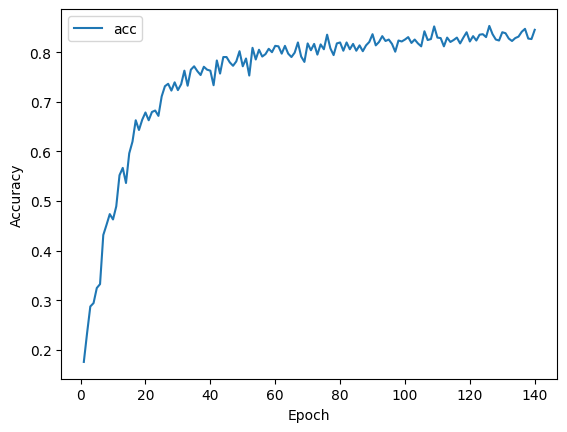

In [ ]:
plt.plot(list(range(1, 141)), accuracies, label='acc')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.savefig('/content/val_acc_140.png')
plt.show()

# 5. Test the network on the test data

GroundTruth:  pink primrose, pink primrose, pink primrose, pink primrose


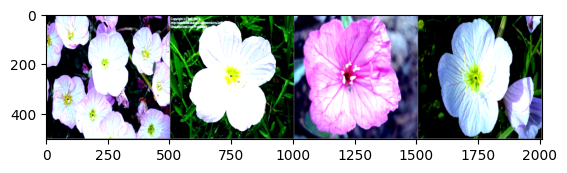

In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images[:4]))
print('GroundTruth: ', ', '.join('%5s' % classes[labels[j]] for j in range(4)))

Let us see what the neural network thinks these examples above are:



In [ ]:
net.eval()
with torch.no_grad():
  outputs = net(images.to(device))

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ', '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:  pink primrose, pink primrose, tree mallow, pink primrose


Let us look at how the network performs on the whole dataset.



In [ ]:
# ResNet(ReLU)
correct = 0
total = 0
net.eval()

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images.to(device))

        # 獲取實際的批次大小
        batch_size = labels.size(0)
        # 將模型輸出形狀轉換為一維張量
        outputs = outputs.view(batch_size, -1)

        _, predicted = torch.max(outputs, 1)
        total += batch_size
        correct += (predicted.cpu() == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

Accuracy of the network on the test images: 81 %


In [ ]:
# ResNet(Leaky ReLU)
correct = 0
total = 0
net.eval()

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images.to(device))

        batch_size = labels.size(0)
        outputs = outputs.view(batch_size, -1)

        _, predicted = torch.max(outputs, 1)
        total += batch_size
        correct += (predicted.cpu() == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

Accuracy of the network on the test images: 82 %


In [ ]:
# ResNet(RPeLU)
correct = 0
total = 0
net.eval()

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images.to(device))

        batch_size = labels.size(0)
        outputs = outputs.view(batch_size, -1)

        _, predicted = torch.max(outputs, 1)
        total += batch_size
        correct += (predicted.cpu() == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

Accuracy of the network on the test images: 77 %


In [1]:
# CNN
correct = 0
total = 0
net.eval()

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images.to(device))

        batch_size = labels.size(0)
        outputs = outputs.view(batch_size, -1)

        _, predicted = torch.max(outputs, 1)
        total += batch_size
        correct += (predicted.cpu() == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

Accuracy of the network on the test images: 86 %


In [ ]:
# ResNet(ReLU): Size 320, learning rate 0.0001
correct = 0
total = 0
net.eval()

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images.to(device))

        batch_size = labels.size(0)
        outputs = outputs.view(batch_size, -1)

        _, predicted = torch.max(outputs, 1)
        total += batch_size
        correct += (predicted.cpu() == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

Accuracy of the network on the test images: 84 %


What are the classes that performed well, and the classes that did
not perform well:



In [ ]:
# ResNet(ReLU): Size 320, learning rate 0.0001
class_correct = list(0. for i in range(102))
class_total = list(0. for i in range(102))
preds = np.zeros((1))
truth = np.zeros((1))
net.eval()

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images.to(device))
        _, predicted = torch.max(outputs, 1)
        c = (predicted.cpu() == labels).squeeze()
        preds = np.concatenate([preds, predicted.cpu().numpy()], axis=0)
        truth = np.concatenate([truth, labels.numpy()], axis=0)
        for i in range(len(labels)):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

new_classes = []
for i in range(102):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))
    if class_correct[i] < 6:
      new_classes.append(classes[i])

Accuracy of pink primrose : 80 %
Accuracy of hard-leaved pocket orchid : 100 %
Accuracy of canterbury bells : 30 %
Accuracy of sweet pea : 50 %
Accuracy of english marigold : 70 %
Accuracy of tiger lily : 60 %
Accuracy of moon orchid : 60 %
Accuracy of bird of paradise : 90 %
Accuracy of monkshood : 90 %
Accuracy of globe thistle : 70 %
Accuracy of snapdragon : 60 %
Accuracy of colt's foot : 100 %
Accuracy of king protea : 70 %
Accuracy of spear thistle : 100 %
Accuracy of yellow iris : 70 %
Accuracy of globe-flower : 60 %
Accuracy of purple coneflower : 100 %
Accuracy of peruvian lily : 90 %
Accuracy of balloon flower : 60 %
Accuracy of giant white arum lily : 80 %
Accuracy of fire lily : 100 %
Accuracy of pincushion flower : 100 %
Accuracy of fritillary : 70 %
Accuracy of red ginger : 60 %
Accuracy of grape hyacinth : 60 %
Accuracy of corn poppy : 100 %
Accuracy of prince of wales feathers : 70 %
Accuracy of stemless gentian : 80 %
Accuracy of artichoke : 100 %
Accuracy of sweet will

In [ ]:
print(new_classes)

['canterbury bells', 'sweet pea', 'siam tulip', 'barbeton daisy', 'columbine', 'pink quill']


In [ ]:
# CNN
class_correct = list(0. for i in range(102))
class_total = list(0. for i in range(102))
preds = np.zeros((1))
truth = np.zeros((1))
net.eval()

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images.to(device))
        _, predicted = torch.max(outputs, 1)
        c = (predicted.cpu() == labels).squeeze()
        preds = np.concatenate([preds, predicted.cpu().numpy()], axis=0)
        truth = np.concatenate([truth, labels.numpy()], axis=0)
        for i in range(len(labels)):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

new_classes = []
for i in range(102):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))
    if class_correct[i] < 6:
      new_classes.append(classes[i])

Accuracy of pink primrose : 60 %
Accuracy of hard-leaved pocket orchid : 100 %
Accuracy of canterbury bells : 30 %
Accuracy of sweet pea : 60 %
Accuracy of english marigold : 90 %
Accuracy of tiger lily : 100 %
Accuracy of moon orchid : 90 %
Accuracy of bird of paradise : 100 %
Accuracy of monkshood : 60 %
Accuracy of globe thistle : 90 %
Accuracy of snapdragon : 90 %
Accuracy of colt's foot : 100 %
Accuracy of king protea : 90 %
Accuracy of spear thistle : 60 %
Accuracy of yellow iris : 100 %
Accuracy of globe-flower : 50 %
Accuracy of purple coneflower : 100 %
Accuracy of peruvian lily : 80 %
Accuracy of balloon flower : 60 %
Accuracy of giant white arum lily : 80 %
Accuracy of fire lily : 100 %
Accuracy of pincushion flower : 90 %
Accuracy of fritillary : 80 %
Accuracy of red ginger : 90 %
Accuracy of grape hyacinth : 90 %
Accuracy of corn poppy : 100 %
Accuracy of prince of wales feathers : 100 %
Accuracy of stemless gentian : 50 %
Accuracy of artichoke : 90 %
Accuracy of sweet wil

In [ ]:
print(new_classes)

['canterbury bells', 'globe-flower', 'stemless gentian', 'carnation', 'siam tulip']


Display the confusion matrix as a heatmap

Text(195.72222222222223, 0.5, 'Label (ground truth)')

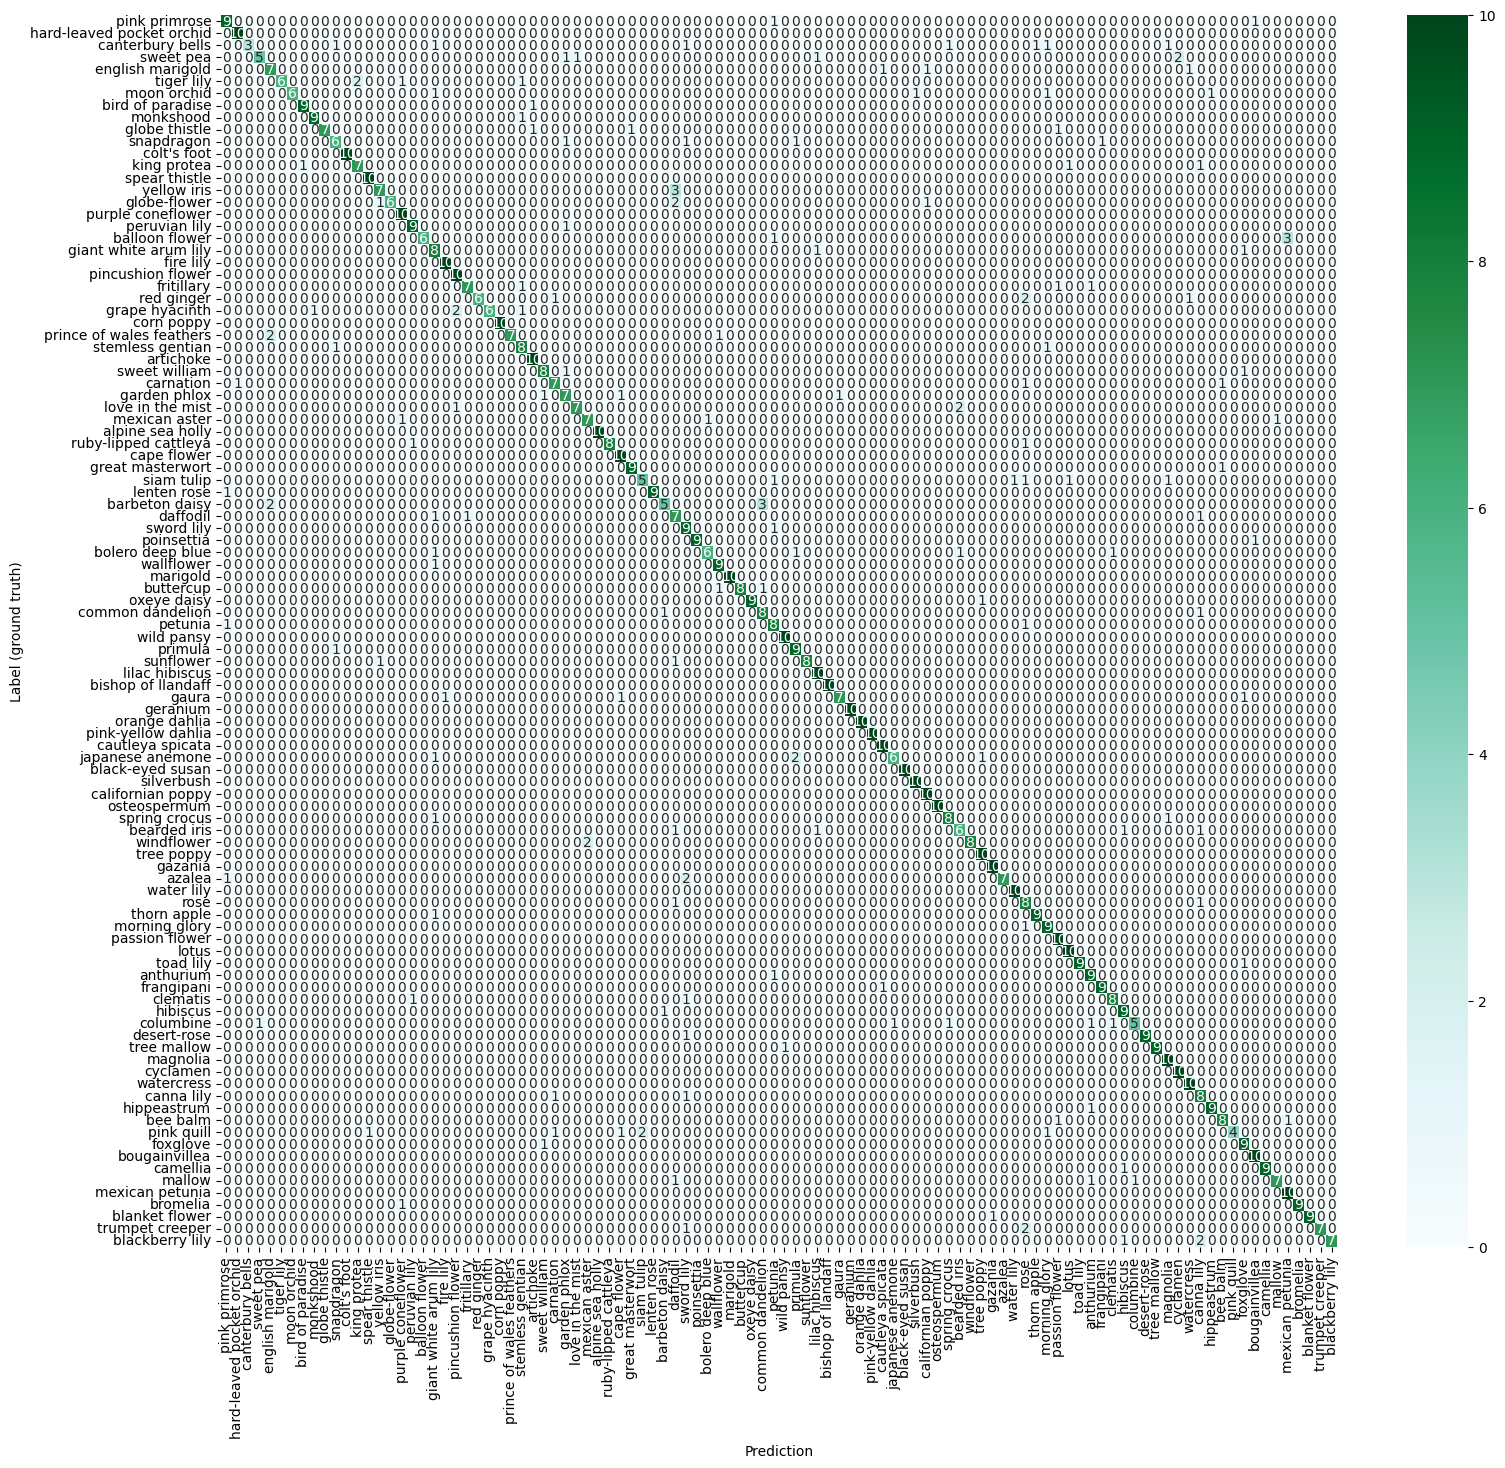

In [ ]:
# ResNet(ReLU): Size 320, learning rate 0.0001
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
arr = confusion_matrix(truth, preds)
class_names = ['pink primrose', 'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea',
           'english marigold', 'tiger lily', 'moon orchid', 'bird of paradise', 'monkshood', 'globe thistle',
           'snapdragon', "colt's foot", 'king protea', 'spear thistle', 'yellow iris',
           'globe-flower', 'purple coneflower', 'peruvian lily', 'balloon flower', 'giant white arum lily',
           'fire lily', 'pincushion flower', 'fritillary', 'red ginger', 'grape hyacinth', 'corn poppy',
           'prince of wales feathers', 'stemless gentian', 'artichoke', 'sweet william', 'carnation',
           'garden phlox', 'love in the mist', 'mexican aster', 'alpine sea holly', 'ruby-lipped cattleya',
           'cape flower', 'great masterwort', 'siam tulip', 'lenten rose', 'barbeton daisy', 'daffodil',
           'sword lily', 'poinsettia', 'bolero deep blue', 'wallflower', 'marigold', 'buttercup',
           'oxeye daisy', 'common dandelion', 'petunia', 'wild pansy', 'primula', 'sunflower',
           'lilac hibiscus', 'bishop of llandaff', 'gaura', 'geranium', 'orange dahlia', 'pink-yellow dahlia',
           'cautleya spicata', 'japanese anemone', 'black-eyed susan', 'silverbush', 'californian poppy', 'osteospermum',
           'spring crocus', 'bearded iris', 'windflower', 'tree poppy', 'gazania', 'azalea', 'water lily',
           'rose', 'thorn apple', 'morning glory', 'passion flower', 'lotus', 'toad lily', 'anthurium',
           'frangipani', 'clematis', 'hibiscus', 'columbine', 'desert-rose', 'tree mallow', 'magnolia', 'cyclamen',
           'watercress', 'canna lily', 'hippeastrum', 'bee balm', 'pink quill', 'foxglove', 'bougainvillea', 'camellia',
           'mallow', 'mexican petunia', 'bromelia', 'blanket flower', 'trumpet creeper', 'blackberry lily']
df_cm = pd.DataFrame(arr, class_names, class_names)
plt.figure(figsize = (18, 16))
sns.heatmap(df_cm, annot=True, fmt="d", cmap='BuGn', xticklabels=True, yticklabels=True)
plt.xlabel("Prediction")
plt.ylabel("Label (ground truth)")

Text(195.72222222222223, 0.5, 'Label (ground truth)')

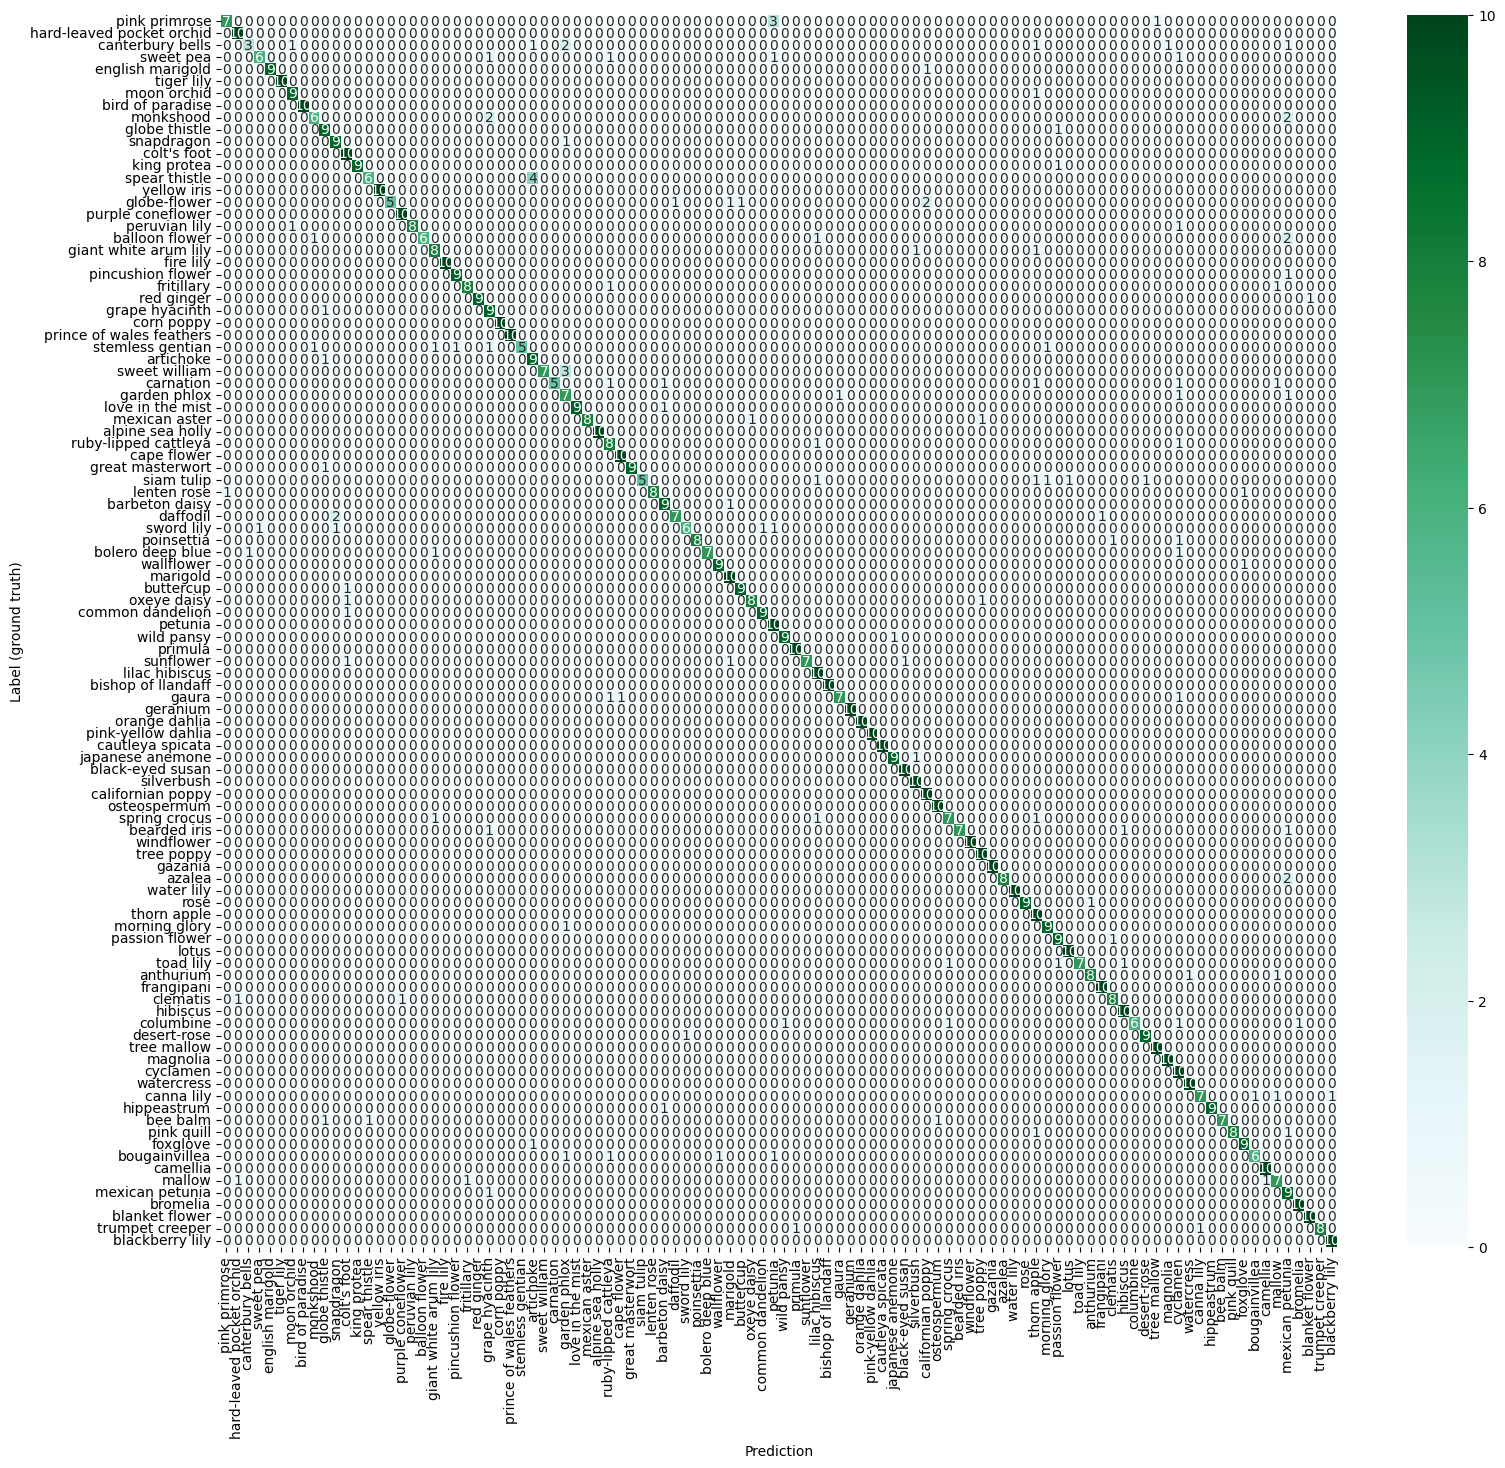

In [ ]:
# CNN
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
arr = confusion_matrix(truth, preds)
class_names = ['pink primrose', 'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea',
           'english marigold', 'tiger lily', 'moon orchid', 'bird of paradise', 'monkshood', 'globe thistle',
           'snapdragon', "colt's foot", 'king protea', 'spear thistle', 'yellow iris',
           'globe-flower', 'purple coneflower', 'peruvian lily', 'balloon flower', 'giant white arum lily',
           'fire lily', 'pincushion flower', 'fritillary', 'red ginger', 'grape hyacinth', 'corn poppy',
           'prince of wales feathers', 'stemless gentian', 'artichoke', 'sweet william', 'carnation',
           'garden phlox', 'love in the mist', 'mexican aster', 'alpine sea holly', 'ruby-lipped cattleya',
           'cape flower', 'great masterwort', 'siam tulip', 'lenten rose', 'barbeton daisy', 'daffodil',
           'sword lily', 'poinsettia', 'bolero deep blue', 'wallflower', 'marigold', 'buttercup',
           'oxeye daisy', 'common dandelion', 'petunia', 'wild pansy', 'primula', 'sunflower',
           'lilac hibiscus', 'bishop of llandaff', 'gaura', 'geranium', 'orange dahlia', 'pink-yellow dahlia',
           'cautleya spicata', 'japanese anemone', 'black-eyed susan', 'silverbush', 'californian poppy', 'osteospermum',
           'spring crocus', 'bearded iris', 'windflower', 'tree poppy', 'gazania', 'azalea', 'water lily',
           'rose', 'thorn apple', 'morning glory', 'passion flower', 'lotus', 'toad lily', 'anthurium',
           'frangipani', 'clematis', 'hibiscus', 'columbine', 'desert-rose', 'tree mallow', 'magnolia', 'cyclamen',
           'watercress', 'canna lily', 'hippeastrum', 'bee balm', 'pink quill', 'foxglove', 'bougainvillea', 'camellia',
           'mallow', 'mexican petunia', 'bromelia', 'blanket flower', 'trumpet creeper', 'blackberry lily']
df_cm = pd.DataFrame(arr, class_names, class_names)
plt.figure(figsize = (18, 16))
sns.heatmap(df_cm, annot=True, fmt="d", cmap='BuGn', xticklabels=True, yticklabels=True)
plt.xlabel("Prediction")
plt.ylabel("Label (ground truth)")

Some multi-class performance report defined from Scikit-learn

In [ ]:
# ResNet(ReLU): Size 320, learning rate 0.0001
from sklearn.metrics import classification_report
print(classification_report(truth, preds, target_names=class_names))

                           precision    recall  f1-score   support

            pink primrose       1.00      0.64      0.78        11
hard-leaved pocket orchid       0.67      1.00      0.80        10
         canterbury bells       0.71      0.50      0.59        10
                sweet pea       0.67      0.40      0.50        10
         english marigold       1.00      0.90      0.95        10
               tiger lily       1.00      0.70      0.82        10
              moon orchid       1.00      0.80      0.89        10
         bird of paradise       0.83      1.00      0.91        10
                monkshood       0.57      0.80      0.67        10
            globe thistle       0.89      0.80      0.84        10
               snapdragon       0.69      0.90      0.78        10
              colt's foot       0.91      1.00      0.95        10
              king protea       1.00      0.80      0.89        10
            spear thistle       1.00      1.00      1.00     

In [ ]:
# CNN
from sklearn.metrics import classification_report
print(classification_report(truth, preds, target_names=class_names))

                           precision    recall  f1-score   support

            pink primrose       0.88      0.64      0.74        11
hard-leaved pocket orchid       0.83      1.00      0.91        10
         canterbury bells       0.75      0.30      0.43        10
                sweet pea       0.86      0.60      0.71        10
         english marigold       1.00      0.90      0.95        10
               tiger lily       1.00      1.00      1.00        10
              moon orchid       0.82      0.90      0.86        10
         bird of paradise       1.00      1.00      1.00        10
                monkshood       0.75      0.60      0.67        10
            globe thistle       0.69      0.90      0.78        10
               snapdragon       0.75      0.90      0.82        10
              colt's foot       0.71      1.00      0.83        10
              king protea       1.00      0.90      0.95        10
            spear thistle       0.86      0.60      0.71     